In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load



import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-jan-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-jan-2022/train.csv
/kaggle/input/tabular-playground-series-jan-2022/test.csv
/kaggle/input/gdpdatafinlandnorwaysweden/GDP_data_2015_to_2019_Finland_Norway_Sweden.csv


**IMPORTING DATA**

In [2]:
sample_submission = pd.read_csv('../input/tabular-playground-series-jan-2022/sample_submission.csv')
train = pd.read_csv('../input/tabular-playground-series-jan-2022/train.csv')
test = pd.read_csv('../input/tabular-playground-series-jan-2022/test.csv')
gdp = pd.read_csv('../input/gdpdatafinlandnorwaysweden/GDP_data_2015_to_2019_Finland_Norway_Sweden.csv')

**CHECKING DATA**

In [3]:
train

,row_id,date,country,store,product,num_sold
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911
...,...,...,...,...,...,...
26293,26293,2018-12-31,Sweden,KaggleMart,Kaggle Hat,823
26294,26294,2018-12-31,Sweden,KaggleMart,Kaggle Sticker,250
26295,26295,2018-12-31,Sweden,KaggleRama,Kaggle Mug,1004
26296,26296,2018-12-31,Sweden,KaggleRama,Kaggle Hat,1441


In [4]:
test

,row_id,date,country,store,product
0,26298,2019-01-01,Finland,KaggleMart,Kaggle Mug
1,26299,2019-01-01,Finland,KaggleMart,Kaggle Hat
2,26300,2019-01-01,Finland,KaggleMart,Kaggle Sticker
3,26301,2019-01-01,Finland,KaggleRama,Kaggle Mug
4,26302,2019-01-01,Finland,KaggleRama,Kaggle Hat
...,...,...,...,...,...
6565,32863,2019-12-31,Sweden,KaggleMart,Kaggle Hat
6566,32864,2019-12-31,Sweden,KaggleMart,Kaggle Sticker
6567,32865,2019-12-31,Sweden,KaggleRama,Kaggle Mug
6568,32866,2019-12-31,Sweden,KaggleRama,Kaggle Hat


In [5]:
gdp

,year,GDP_Finland,GDP_Norway,GDP_Sweden
0,2015,234.440,385.802,505.104
1,2016,240.608,368.827,515.655
2,2017,255.017,398.394,541.019
3,2018,275.580,437.000,555.455
4,2019,268.782,405.510,533.880


In [6]:
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         5 non-null      int64  
 1   GDP_Finland  5 non-null      float64
 2   GDP_Norway   5 non-null      float64
 3   GDP_Sweden   5 non-null      float64
dtypes: float64(3), int64(1)
memory usage: 288.0 bytes


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26298 entries, 0 to 26297
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   row_id    26298 non-null  int64 
 1   date      26298 non-null  object
 2   country   26298 non-null  object
 3   store     26298 non-null  object
 4   product   26298 non-null  object
 5   num_sold  26298 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.2+ MB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6570 entries, 0 to 6569
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   row_id   6570 non-null   int64 
 1   date     6570 non-null   object
 2   country  6570 non-null   object
 3   store    6570 non-null   object
 4   product  6570 non-null   object
dtypes: int64(1), object(4)
memory usage: 256.8+ KB


In [9]:
train.describe()

,row_id,num_sold
count,26298.000000,26298.000000
mean,13148.500000,387.533577
std,7591.723026,266.076193
min,0.000000,70.000000
25%,6574.250000,190.000000
50%,13148.500000,315.000000
75%,19722.750000,510.000000
max,26297.000000,2884.000000


In [10]:
test.describe()

,row_id
count,6570.000000
mean,29582.500000
std,1896.739966
min,26298.000000
25%,27940.250000
50%,29582.500000
75%,31224.750000
max,32867.000000


In [11]:
#Convert date column to datetime
train['date']=pd.to_datetime(train['date'])
test['date']=pd.to_datetime(test['date'])
train.dtypes,test.dtypes

(row_id               int64
 date        datetime64[ns]
 country             object
 store               object
 product             object
 num_sold             int64
 dtype: object,
 row_id              int64
 date       datetime64[ns]
 country            object
 store              object
 product            object
 dtype: object)

**DATA VISUALIZATING**

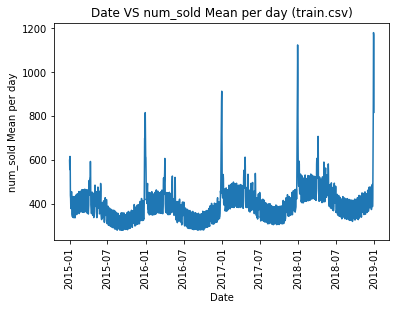

In [12]:
import matplotlib.pyplot as plt
plt.plot(train['date'].unique(),train['num_sold'].groupby(train['date']).mean())
plt.title('Date VS num_sold Mean per day (train.csv)')
plt.xlabel('Date')
plt.ylabel('num_sold Mean per day')
plt.xticks(rotation=90)
plt.show()

**CHECKING MISSING VALUE**

In [13]:
#function to find Missing Value in every columns
def get_missing_value(df):
    mis_val = df.isnull().sum()
    tot_val = df.shape[0]
    mis_percentage = round((100 * mis_val / tot_val),2)
    miss_tab = pd.concat([mis_val, mis_percentage], axis=1)
    miss_tab_col_name = miss_tab.rename(columns = {0 : 'Row With Missing Value', 1 : 'Percentage (%)'})
    miss_tab_col_name = miss_tab_col_name.sort_values('Percentage (%)',ascending=False)
    return miss_tab_col_name

In [14]:
get_missing_value(train)

,Row With Missing Value,Percentage (%)
row_id,0,0.0
date,0,0.0
country,0,0.0
store,0,0.0
product,0,0.0
num_sold,0,0.0


In [15]:
get_missing_value(test)

,Row With Missing Value,Percentage (%)
row_id,0,0.0
date,0,0.0
country,0,0.0
store,0,0.0
product,0,0.0


In [16]:
#dropping row id column
train.drop(['row_id'],axis=1,inplace=True)
test.drop(['row_id'],axis=1,inplace=True)

**FEATURE ENGINEERING**

In [17]:
def time_splitter(df,date): 
    df[date]         = pd.to_datetime(df[date])
    df['year']       = df[date].dt.year
    df['month']      = df[date].dt.month
    df['day']        = df[date].dt.day
    df['week']       = df[date].dt.isocalendar().week
    df['weekday']    = df[date].dt.weekday
    df['weekend']    = (df[date].dt.weekday>4).astype(int)
    df['day_of_yr']  = df[date].dt.dayofyear
    df['quarter']    = df[date].dt.quarter
    return df

In [18]:
time_splitter(train,'date')

,date,country,store,product,num_sold,year,month,day,week,weekday,weekend,day_of_yr,quarter
0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329,2015,1,1,1,3,0,1,1
1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520,2015,1,1,1,3,0,1,1
2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146,2015,1,1,1,3,0,1,1
3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572,2015,1,1,1,3,0,1,1
4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911,2015,1,1,1,3,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26293,2018-12-31,Sweden,KaggleMart,Kaggle Hat,823,2018,12,31,1,0,0,365,4
26294,2018-12-31,Sweden,KaggleMart,Kaggle Sticker,250,2018,12,31,1,0,0,365,4
26295,2018-12-31,Sweden,KaggleRama,Kaggle Mug,1004,2018,12,31,1,0,0,365,4
26296,2018-12-31,Sweden,KaggleRama,Kaggle Hat,1441,2018,12,31,1,0,0,365,4


In [19]:
time_splitter(test,'date')

,date,country,store,product,year,month,day,week,weekday,weekend,day_of_yr,quarter
0,2019-01-01,Finland,KaggleMart,Kaggle Mug,2019,1,1,1,1,0,1,1
1,2019-01-01,Finland,KaggleMart,Kaggle Hat,2019,1,1,1,1,0,1,1
2,2019-01-01,Finland,KaggleMart,Kaggle Sticker,2019,1,1,1,1,0,1,1
3,2019-01-01,Finland,KaggleRama,Kaggle Mug,2019,1,1,1,1,0,1,1
4,2019-01-01,Finland,KaggleRama,Kaggle Hat,2019,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6565,2019-12-31,Sweden,KaggleMart,Kaggle Hat,2019,12,31,1,1,0,365,4
6566,2019-12-31,Sweden,KaggleMart,Kaggle Sticker,2019,12,31,1,1,0,365,4
6567,2019-12-31,Sweden,KaggleRama,Kaggle Mug,2019,12,31,1,1,0,365,4
6568,2019-12-31,Sweden,KaggleRama,Kaggle Hat,2019,12,31,1,1,0,365,4


In [20]:
#dropping date column
train.drop(['date'],axis=1,inplace=True)
test.drop(['date'],axis=1,inplace=True)

In [21]:
#Label Encoding for categorical features (train)
from sklearn.preprocessing import LabelEncoder
for i in train[train.dtypes[train.dtypes == "object"].index].columns:
    le = LabelEncoder() 
    le.fit(list(train[i].values)) 
    train[i] = le.transform(list(train[i].values))
train

,country,store,product,num_sold,year,month,day,week,weekday,weekend,day_of_yr,quarter
0,0,0,1,329,2015,1,1,1,3,0,1,1
1,0,0,0,520,2015,1,1,1,3,0,1,1
2,0,0,2,146,2015,1,1,1,3,0,1,1
3,0,1,1,572,2015,1,1,1,3,0,1,1
4,0,1,0,911,2015,1,1,1,3,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
26293,2,0,0,823,2018,12,31,1,0,0,365,4
26294,2,0,2,250,2018,12,31,1,0,0,365,4
26295,2,1,1,1004,2018,12,31,1,0,0,365,4
26296,2,1,0,1441,2018,12,31,1,0,0,365,4


In [22]:
train=pd.merge(train,gdp,how='inner',on='year')
train

,country,store,product,num_sold,year,month,day,week,weekday,weekend,day_of_yr,quarter,GDP_Finland,GDP_Norway,GDP_Sweden
0,0,0,1,329,2015,1,1,1,3,0,1,1,234.44,385.802,505.104
1,0,0,0,520,2015,1,1,1,3,0,1,1,234.44,385.802,505.104
2,0,0,2,146,2015,1,1,1,3,0,1,1,234.44,385.802,505.104
3,0,1,1,572,2015,1,1,1,3,0,1,1,234.44,385.802,505.104
4,0,1,0,911,2015,1,1,1,3,0,1,1,234.44,385.802,505.104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26293,2,0,0,823,2018,12,31,1,0,0,365,4,275.58,437.000,555.455
26294,2,0,2,250,2018,12,31,1,0,0,365,4,275.58,437.000,555.455
26295,2,1,1,1004,2018,12,31,1,0,0,365,4,275.58,437.000,555.455
26296,2,1,0,1441,2018,12,31,1,0,0,365,4,275.58,437.000,555.455


In [23]:
test

,country,store,product,year,month,day,week,weekday,weekend,day_of_yr,quarter
0,Finland,KaggleMart,Kaggle Mug,2019,1,1,1,1,0,1,1
1,Finland,KaggleMart,Kaggle Hat,2019,1,1,1,1,0,1,1
2,Finland,KaggleMart,Kaggle Sticker,2019,1,1,1,1,0,1,1
3,Finland,KaggleRama,Kaggle Mug,2019,1,1,1,1,0,1,1
4,Finland,KaggleRama,Kaggle Hat,2019,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
6565,Sweden,KaggleMart,Kaggle Hat,2019,12,31,1,1,0,365,4
6566,Sweden,KaggleMart,Kaggle Sticker,2019,12,31,1,1,0,365,4
6567,Sweden,KaggleRama,Kaggle Mug,2019,12,31,1,1,0,365,4
6568,Sweden,KaggleRama,Kaggle Hat,2019,12,31,1,1,0,365,4


In [24]:
test=pd.merge(test,gdp,how='inner',on='year')
test

,country,store,product,year,month,day,week,weekday,weekend,day_of_yr,quarter,GDP_Finland,GDP_Norway,GDP_Sweden
0,Finland,KaggleMart,Kaggle Mug,2019,1,1,1,1,0,1,1,268.782,405.51,533.88
1,Finland,KaggleMart,Kaggle Hat,2019,1,1,1,1,0,1,1,268.782,405.51,533.88
2,Finland,KaggleMart,Kaggle Sticker,2019,1,1,1,1,0,1,1,268.782,405.51,533.88
3,Finland,KaggleRama,Kaggle Mug,2019,1,1,1,1,0,1,1,268.782,405.51,533.88
4,Finland,KaggleRama,Kaggle Hat,2019,1,1,1,1,0,1,1,268.782,405.51,533.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6565,Sweden,KaggleMart,Kaggle Hat,2019,12,31,1,1,0,365,4,268.782,405.51,533.88
6566,Sweden,KaggleMart,Kaggle Sticker,2019,12,31,1,1,0,365,4,268.782,405.51,533.88
6567,Sweden,KaggleRama,Kaggle Mug,2019,12,31,1,1,0,365,4,268.782,405.51,533.88
6568,Sweden,KaggleRama,Kaggle Hat,2019,12,31,1,1,0,365,4,268.782,405.51,533.88


In [25]:
#Label Encoding for categorical features (test)
from sklearn.preprocessing import LabelEncoder
for i in test[test.dtypes[test.dtypes == "object"].index].columns:
    le = LabelEncoder() 
    le.fit(list(test[i].values)) 
    test[i] = le.transform(list(test[i].values))
test

,country,store,product,year,month,day,week,weekday,weekend,day_of_yr,quarter,GDP_Finland,GDP_Norway,GDP_Sweden
0,0,0,1,2019,1,1,1,1,0,1,1,268.782,405.51,533.88
1,0,0,0,2019,1,1,1,1,0,1,1,268.782,405.51,533.88
2,0,0,2,2019,1,1,1,1,0,1,1,268.782,405.51,533.88
3,0,1,1,2019,1,1,1,1,0,1,1,268.782,405.51,533.88
4,0,1,0,2019,1,1,1,1,0,1,1,268.782,405.51,533.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6565,2,0,0,2019,12,31,1,1,0,365,4,268.782,405.51,533.88
6566,2,0,2,2019,12,31,1,1,0,365,4,268.782,405.51,533.88
6567,2,1,1,2019,12,31,1,1,0,365,4,268.782,405.51,533.88
6568,2,1,0,2019,12,31,1,1,0,365,4,268.782,405.51,533.88


In [26]:
train['week']=train['week'].astype('int')
train.dtypes

country          int64
store            int64
product          int64
num_sold         int64
year             int64
month            int64
day              int64
week             int64
weekday          int64
weekend          int64
day_of_yr        int64
quarter          int64
GDP_Finland    float64
GDP_Norway     float64
GDP_Sweden     float64
dtype: object

In [27]:
test['week']=test['week'].astype('int')
test.dtypes

country          int64
store            int64
product          int64
year             int64
month            int64
day              int64
week             int64
weekday          int64
weekend          int64
day_of_yr        int64
quarter          int64
GDP_Finland    float64
GDP_Norway     float64
GDP_Sweden     float64
dtype: object

**MODELLING**

In [28]:
#Import necessary tools
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score

In [29]:
#splitting to validation and train data
X = train.drop(['num_sold'],axis=1)
y = train['num_sold']

#using train_test_split
X_train , X_val , y_train , y_val = train_test_split(X, y, test_size=0.15, random_state = 42)

In [30]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_prediction = lr.predict(X_val)
lr_RMSE = np.sqrt(mean_squared_error(y_val,lr_prediction))
lr_RMSE

151.9895558749253

In [31]:
ls = Lasso()
ls.fit(X_train,y_train)
ls_prediction = ls.predict(X_val)
ls_RMSE = np.sqrt(mean_squared_error(y_val,ls_prediction))
ls_RMSE

152.05704527202462

In [32]:
rg = Ridge()
rg.fit(X_train,y_train)
rg_prediction = rg.predict(X_val)
rg_RMSE = np.sqrt(mean_squared_error(y_val,rg_prediction))
rg_RMSE

151.94796760555184

In [33]:
en = ElasticNet()
en.fit(X_train,y_train)
en_prediction = en.predict(X_val)
en_RMSE = np.sqrt(mean_squared_error(y_val,en_prediction))
en_RMSE

187.71506234571282

In [34]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
rf_prediction = rf.predict(X_val)
rf_RMSE = np.sqrt(mean_squared_error(y_val,rf_prediction))
rf_RMSE

35.92651535285936

In [35]:
gr = GradientBoostingRegressor()
gr.fit(X_train,y_train)
gr_prediction = gr.predict(X_val)
gr_RMSE = np.sqrt(mean_squared_error(y_val,gr_prediction))
gr_RMSE

56.58351437368564

In [36]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
dt_prediction = dt.predict(X_val)
dt_RMSE = np.sqrt(mean_squared_error(y_val,dt_prediction))
dt_RMSE

48.02101884540321

In [37]:
kn = KNeighborsRegressor()
kn.fit(X_train,y_train)
kn_prediction = kn.predict(X_val)
kn_RMSE = np.sqrt(mean_squared_error(y_val,kn_prediction))
kn_RMSE

181.74929905217493

In [38]:
lgb = LGBMRegressor()
lgb.fit(X_train,y_train)
lgb_prediction = lgb.predict(X_val)
lgb_RMSE = np.sqrt(mean_squared_error(y_val,lgb_prediction))
lgb_RMSE

31.252545195103735

In [39]:
xgb = XGBRegressor()
xgb.fit(X_train,y_train)
xgb_prediction = xgb.predict(X_val)
xgb_RMSE = np.sqrt(mean_squared_error(y_val,xgb_prediction))
xgb_RMSE

30.582292059610634

In [40]:
cat = CatBoostRegressor()
cat.fit(X_train,y_train)
cat_prediction = cat.predict(X_val)
cat_RMSE = np.sqrt(mean_squared_error(y_val,cat_prediction))
cat_RMSE

Learning rate set to 0.066892
0:	learn: 251.2592475	total: 56.4ms	remaining: 56.4s
1:	learn: 237.3867223	total: 59.9ms	remaining: 29.9s
2:	learn: 224.6022288	total: 63.1ms	remaining: 21s
3:	learn: 212.7545493	total: 66.2ms	remaining: 16.5s
4:	learn: 201.6922445	total: 69.4ms	remaining: 13.8s
5:	learn: 191.8052385	total: 72.7ms	remaining: 12s
6:	learn: 182.5327099	total: 76.5ms	remaining: 10.9s
7:	learn: 173.6474380	total: 79.8ms	remaining: 9.9s
8:	learn: 165.3809457	total: 83.2ms	remaining: 9.16s
9:	learn: 157.9444961	total: 86.4ms	remaining: 8.55s
10:	learn: 150.9270029	total: 89.7ms	remaining: 8.06s
11:	learn: 144.6691240	total: 92.8ms	remaining: 7.64s
12:	learn: 138.3362095	total: 96.1ms	remaining: 7.29s
13:	learn: 133.1123470	total: 99.4ms	remaining: 7s
14:	learn: 127.6814188	total: 103ms	remaining: 6.73s
15:	learn: 122.6352892	total: 106ms	remaining: 6.51s
16:	learn: 118.2675130	total: 109ms	remaining: 6.29s
17:	learn: 113.7426735	total: 112ms	remaining: 6.11s
18:	learn: 109.92586

28.316558525068938

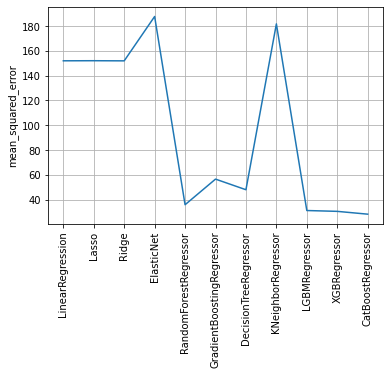

In [41]:
a = ['LinearRegression','Lasso','Ridge','ElasticNet','RandomForestRegressor','GradientBoostingRegressor','DecisionTreeRegressor','KNeighborRegressor','LGBMRegressor','XGBRegressor','CatBoostRegressor']
b = [lr_RMSE,ls_RMSE,rg_RMSE,en_RMSE,rf_RMSE,gr_RMSE,dt_RMSE,kn_RMSE,lgb_RMSE,xgb_RMSE,cat_RMSE]
plt.plot(a,b)
plt.ylabel('mean_squared_error')
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [42]:
# #Tuning cat model
model = CatBoostRegressor()
parameters = {'depth' : [7,8,9,10,11,12],
              'learning_rate' : [0.001,0.01,0.05,0.5,0.7,0.9],
              'iterations'    : [100,120,140,160,180]
              }
grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs=-1)
grid.fit(X_train, y_train)
print("Tuned catboost Parameters: {}".format(grid.best_params_)) 
print("Best score is {}".format(grid.best_score_))

0:	learn: 263.7174690	total: 52.1ms	remaining: 5.16s
1:	learn: 261.4878027	total: 55.5ms	remaining: 2.72s
2:	learn: 259.2328978	total: 67.7ms	remaining: 2.19s
3:	learn: 256.9807887	total: 71.4ms	remaining: 1.71s
4:	learn: 254.7791166	total: 79.8ms	remaining: 1.52s
5:	learn: 252.5703805	total: 83.7ms	remaining: 1.31s
6:	learn: 250.5132105	total: 88.9ms	remaining: 1.18s
7:	learn: 248.4560493	total: 96.2ms	remaining: 1.11s
8:	learn: 246.3769316	total: 104ms	remaining: 1.05s
9:	learn: 244.3204981	total: 109ms	remaining: 983ms
10:	learn: 242.2397147	total: 116ms	remaining: 942ms
11:	learn: 240.1750173	total: 124ms	remaining: 912ms
12:	learn: 238.1834221	total: 133ms	remaining: 888ms
13:	learn: 236.2576061	total: 142ms	remaining: 872ms
14:	learn: 234.2422469	total: 153ms	remaining: 869ms
15:	learn: 232.3439516	total: 174ms	remaining: 911ms
16:	learn: 230.3827328	total: 195ms	remaining: 953ms
17:	learn: 228.4313583	total: 215ms	remaining: 978ms
18:	learn: 226.5300219	total: 233ms	remaining: 9

In [43]:
# #Tuning rf model
# # Creating the hyperparameter grid
# rfr_n_estimators = [10,20,30,40,50,60,70,80,90,100]
# rfr_max_depth = [2,3,4,5,6,7,8,9,10]
# rfr_max_features = ['auto','sqrt','log2']
# param_grid = {'n_estimators': rfr_n_estimators,
#              'max_depth' : rfr_max_depth,
#              'max_features' : rfr_max_features,
#              }

# # # Instantiating RFR classifier
# rfr = RandomForestRegressor()

# # # Instantiating the GridSearchCV object
# rfr_cv = GridSearchCV(rfr, param_grid, cv = 5)
# rfr_cv.fit(X_train,y_train)

# # # Print the tuned parameters and score
# print("Tuned RFR Classifier Parameters: {}".format(rfr_cv.best_params_)) 
# print("Best score is {}".format(rfr_cv.best_score_))

In [44]:
fix_prediction = grid.predict(X_val)
fix_RMSE = np.sqrt(mean_squared_error(y_val,fix_prediction))
fix_RMSE

27.595724201678028

In [45]:
prediction = grid.predict(test)
prediction

array([ 324.49127037,  533.00698457,  147.26799686, ...,  958.0291403 ,
       1474.52447927,  402.22365429])

In [46]:
submission = pd.DataFrame({'row_id':sample_submission.row_id, 'num_sold': prediction})
submission['row_id']=submission['row_id'].astype('int32')
submission

,row_id,num_sold
0,26298,324.491270
1,26299,533.006985
2,26300,147.267997
3,26301,595.873781
4,26302,927.915656
...,...,...
6565,32863,817.075618
6566,32864,260.685295
6567,32865,958.029140
6568,32866,1474.524479


In [47]:
submission.to_csv('271jan.csv',index=False)